In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os

# from PaHaW_features_functions import *

In [ ]:
frame_list_PaHaW = []
features_PaHaW = add_drawing_csv('/work/PaHaW_spirals', frame_list_PaHaW)
features_PaHaW

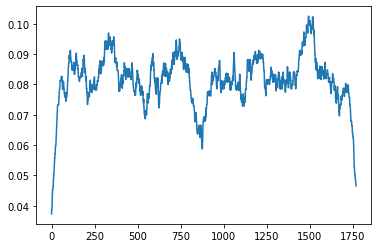

In [ ]:
# PD patient: 
df = pd.read_csv('/work/PaHaW_spirals/00001__1_1.csv')
#df = pd.read_csv('/work/00008__5_1.csv')

dx = []
dy = []
displacement = []
time = []
for i in range(len(df.iloc[:, 0]) - 1): 
    x1 = float(df.iloc[:, 0][i])
    x2 = float(df.iloc[:, 0][i+1])
    y1 = float(df.iloc[:, 1][i])
    y2 = float(df.iloc[:, 1][i+1])
    dx.append(x2-x1)
    dy.append(y2-y1)
    displacement.append(np.sqrt((x2-x1)**2 + (y2-y1)**2))
    time.append(df.iloc[:, 2][i])

x_velocity = []
y_velocity = []
for i in range(len(dx) - 1): 
    x_velocity.append(abs((dx[i+1]-dx[i])/(time[i+1]-time[i])))
    y_velocity.append(abs((dy[i+1]-dy[i])/(time[i+1]-time[i])))

velocity = []
for i in range(len(displacement)): 
    velocity.append(abs((displacement[i]-displacement[i-1])/(time[i]-time[i-1])))

accel = []
for i in range(len(velocity)): 
    accel.append(abs((velocity[i]-velocity[i-1])/(time[i]-time[i-1])))

# healthy patient calculations: 
df1 = pd.read_csv('/work/PaHaW_spirals/00026__1_1.csv')

dx1 = []
dy1 = []
displacement1 = []
time1 = []
for i in range(len(df1.iloc[:, 0]) - 1): 
    x1 = float(df1.iloc[:, 0][i])
    x2 = float(df1.iloc[:, 0][i+1])
    y1 = float(df1.iloc[:, 1][i])
    y2 = float(df1.iloc[:, 1][i+1])
    dx1.append(x2-x1)
    dy1.append(y2-y1)
    displacement1.append(np.sqrt((x2-x1)**2 + (y2-y1)**2))
    time1.append(df1.iloc[:, 2][i])

x_velocity1 = []
y_velocity1 = []
for i in range(len(dx) - 1): 
    x_velocity1.append(abs((dx[i+1]-dx[i])/(time[i+1]-time[i])))
    y_velocity1.append(abs((dy[i+1]-dy[i])/(time[i+1]-time[i])))

velocity1 = []
for i in range(len(displacement1)): 
    velocity1.append(abs((displacement1[i]-displacement1[i-1])/(time1[i]-time1[i-1])))

accel1 = []
for i in range(len(velocity1)): 
    accel1.append(abs((velocity1[i]-velocity1[i-1])/(time1[i]-time1[i-1])))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.figure(1)
plt.plot(smooth(x_velocity, 100))

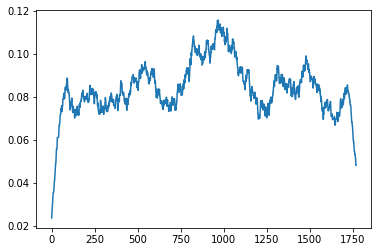

In [ ]:
plt.figure(2)
plt.plot(smooth(y_velocity, 100))

[Text(0.5, 1.0, 'Healthy Control Velocity ')]

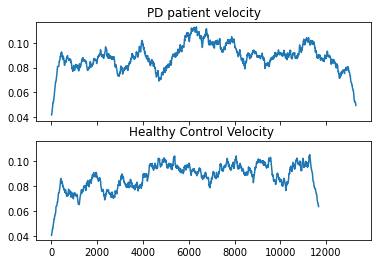

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.subplots(2, 1, sharex = True, sharey = True)
ax[0].plot(time, smooth(velocity, 100))
ax[0].set(title = "PD patient velocity")
ax[1].plot(time1, smooth(velocity1, 100))
ax[1].set(title = "Healthy Control Velocity ")

[Text(0.5, 1.0, 'Healthy Control Displacement ')]

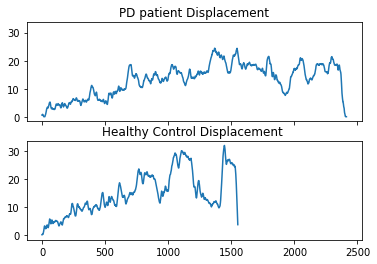

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.subplots(2, 1, sharex = True, sharey = True)
ax[0].plot(smooth(displacement, 100))
ax[0].set(title = "PD patient Displacement")
ax[1].plot(smooth(displacement1, 100))
ax[1].set(title = "Healthy Control Displacement ")

Patient:  0.01089730924856814
Healthy:  0.010154712331981128


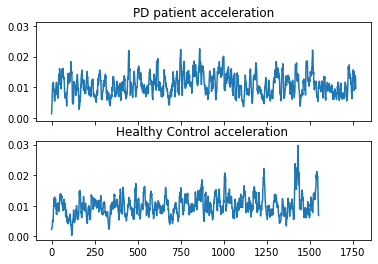

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.subplots(2, 1, sharex = True, sharey = True)
ax[0].plot(smooth(accel, 10))
ax[0].set(title = "PD patient acceleration")
ax[1].plot(smooth(accel1, 10))
ax[1].set(title = "Healthy Control acceleration ")

print("Patient: ", np.mean(accel))
print("Healthy: ", np.mean(accel1))

In [ ]:
df = pd.read_csv('/work/PaHaW_spirals/00002__1_1.csv')

displacement = []
time = []
for i in np.arange(0, len(df.iloc[:, 0])-1): 
    x1 = float(df.iloc[:, 0][i])
    x2 = float(df.iloc[:, 0][i+1])
    y1 = float(df.iloc[:, 1][i])
    y2 = float(df.iloc[:, 1][i+1])
    displacement.append(np.sqrt((x2-x1)**2 + (y2-y1)**2))
    time.append(df.iloc[:, 2][i])

velocity = []
for i in range(len(displacement)): 
    velocity.append(abs((displacement[i]-displacement[i-1])/(time[i]-time[i-1])))

count = 0
for i in velocity: 
    if i==0: 
        count += 1

accel = []
for i in range(len(velocity)): 
    accel.append(abs((velocity[i]-velocity[i-1])/(time[i]-time[i-1])))

print(count, len(displacement), len(velocity), len(accel))

# This is a function that basically does a moving average
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


526 2414 2414 2414


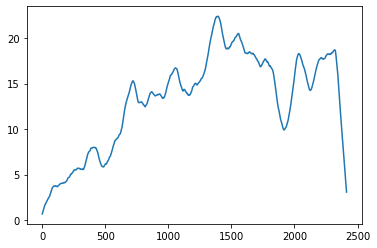

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(smooth(displacement, 100)))

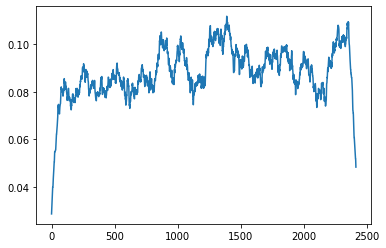

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(smooth(velocity, 100)))

In [ ]:
np.median(velocity)

0.09026477769854235

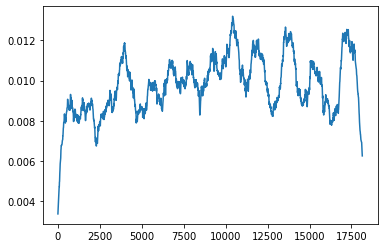

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(time, np.array(smooth(accel, 100)))

In [ ]:
df_h = pd.read_csv('/work/PaHaW_spirals/00026__1_1.csv')

displacement_h = []
time_h = []
for i in np.arange(0, len(df_h.iloc[:, 0]) - 1): 
    x1 = float(df_h.iloc[:, 0][i])
    x2 = float(df_h.iloc[:, 0][i+1])
    y1 = float(df_h.iloc[:, 1][i])
    y2 = float(df_h.iloc[:, 1][i+1])
    displacement_h.append(np.sqrt((x2-x1)**2 + (y2-y1)**2))
    time_h.append(df.iloc[:, 2][i])

velocity_h = []
for i in range(len(displacement_h)): 
    velocity_h.append(abs((displacement_h[i]-displacement_h[i-1])/(time_h[i]-time_h[i-1])))

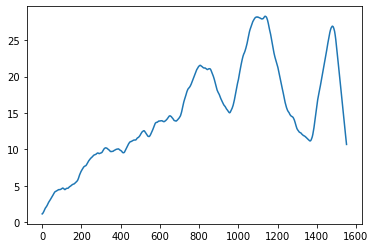

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(smooth(displacement_h, 100)))

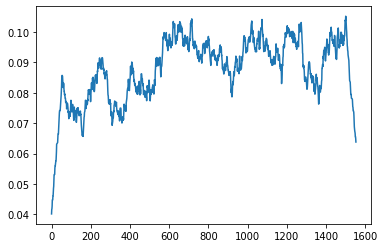

In [ ]:
fig = plt.figure(num = 1, clear = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(smooth(velocity_h, 100)))

In [ ]:
np.median(velocity_h)

0.09098575997594183

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>